In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, plot_confusion_matrix

%matplotlib inline

In [34]:
# import dataset
df_train = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatraining.txt", sep=",")

# check shape of the dataset
print(df_train.shape)

# check overview of the trainset
df_train.head()

(8143, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [35]:
# import dataset
df_test = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatest.txt", sep=",")

# check shape of the dataset
print(df_test.shape)

# check overview of the trainset
df_test.head()

(2665, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [36]:
# import dataset
df_test2 = pd.read_csv("F:\Personal Interest\Data science\Prectice Projects\Occupancy Data - UCI ML\DATASET\datatest2.txt", sep=",")

# check shape of the dataset
print(df_test2.shape)

# check overview of the trainset
df_test2.head()

(9752, 7)


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [37]:
df_train.drop('date',inplace=True, axis=1)
df_test.drop('date',inplace=True, axis=1)
df_test2.drop('date',inplace=True, axis=1)

df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


In [38]:
df_train.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


In [6]:
unoccupied = df_train[df_train['Occupancy'] == 0] # filtering only non-fraud cases
occupied = df_train[df_train['Occupancy'] == 1] # filtering fraud cases

print("Count of unoccupied class: ")
print(unoccupied['Occupancy'].count())

print("Count of occupied class: ")
print(occupied['Occupancy'].count())

Count of unoccupied class: 
6414
Count of occupied class: 
1729


In [7]:
# replicating occupied data to balance out the class imbalance

n = unoccupied.shape[0]

occ_repeat = resample(
    occupied,
    replace=True,
    n_samples=int(0.75*n), # we have taken 75% of the majority class number for resampling
    random_state=1
)

occ_repeat.shape

(4810, 6)

In [8]:
# concatenating oversampled class to unoccupied class

data = pd.concat([unoccupied,occ_repeat], ignore_index=True)

print(data.shape)

data.head()

(11224, 6)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.000,27.20,0.0,681.5,0.004728,0
1,22.945,27.29,0.0,685.0,0.004728,0
2,22.945,27.39,0.0,685.0,0.004745,0
3,22.890,27.39,0.0,689.0,0.004730,0
4,22.890,27.39,0.0,689.5,0.004730,0


In [9]:
# standard normalization of independent variable columns

stdnorm = StandardScaler()

for feature in data.columns[:-1]:
    data[feature] = stdnorm.fit_transform(data[feature].values.reshape(-1,1))

for feature in df_test.columns[:-1]:
    df_test[feature] = stdnorm.transform(df_test[feature].values.reshape(-1,1))

data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2.015242,0.183915,-0.942919,-0.117471,0.785923,0
1,1.962217,0.199613,-0.942919,-0.108393,0.785786,0
2,1.962217,0.217055,-0.942919,-0.108393,0.804685,0
3,1.909192,0.217055,-0.942919,-0.098019,0.787470,0
4,1.909192,0.217055,-0.942919,-0.096722,0.787470,0


In [10]:
# separating training and test set with features and labels

X_train = data.drop('Occupancy', axis=1).values # features
y_train = data['Occupancy'].values # labels

X_test = df_test.drop('Occupancy', axis=1).values # features
y_test = df_test['Occupancy'].values # labels

In [11]:
# Creating various models

# KNN Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_ypred = knn.predict(X_test)

print("knn done.")

# Logostic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_ypred = lr.predict(X_test)

print("lr done.")

# SVM 
svm = SVC()
svm.fit(X_train, y_train)
svm_ypred = svm.predict(X_test)

print("svm done.")

# Random Forest Tree
rft = RandomForestClassifier(max_depth = 5)
rft.fit(X_train, y_train)
rft_ypred = rft.predict(X_test)

print("rft done.")

knn done.
lr done.
svm done.
rft done.


KNN
[[   0 1693]
 [   0  972]]


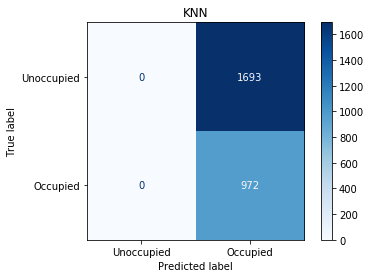

LR
[[   0 1693]
 [   0  972]]


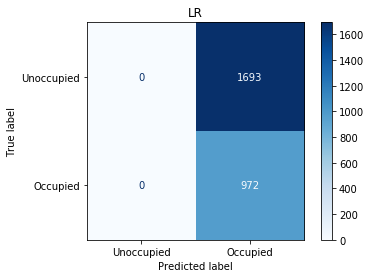

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
SVM
[[1693    0]
 [ 972    0]]


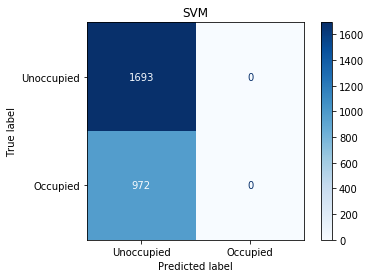

RFT
[[1615   78]
 [   0  972]]


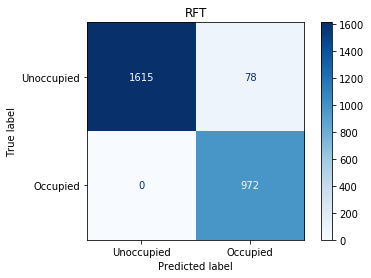

In [12]:
# model names, models and predicted values for each model
models = {'KNN':[knn, knn_ypred], 'LR':[lr, lr_ypred], 'SVM':[svm, svm_ypred], 'RFT':[rft, rft_ypred]}

# list of classes
class_names = ['Unoccupied','Occupied']

# blank dictionaries for saving evaluation metrics for each model 
accuracy = {}
f1_score_dict = {}
precision = {}
recall = {}

for model, model_output in models.items():
    acc = accuracy_score(y_test, model_output[1]) # accuracy
    pre = precision_score(y_test, model_output[1]) # precision
    rec = recall_score(y_test, model_output[1]) # recall
    f1_sc = f1_score(y_test, model_output[1]) # f1 score
    
    # rounding and saving values to disctionary
    accuracy[model] = round(acc,3)
    precision[model] = round(pre,3)
    recall[model] = round(rec,3)
    f1_score_dict[model] = round(f1_sc,3)

    # plotting confusion matrix for each model
    disp = plot_confusion_matrix(
        model_output[0], X_test, y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues
    )

    disp.ax_.set_title(model)

    print(model)
    print(disp.confusion_matrix)

    plt.show()

In [13]:
print(pd.Series(accuracy).to_frame('Accuracy'))
print('--------------')
print(pd.Series(recall).to_frame('Recall'))
print('--------------')
print(pd.Series(precision).to_frame('Precision'))
print('--------------')
print(pd.Series(f1_score_dict).to_frame('F1 Score'))

     Accuracy
KNN     0.365
LR      0.365
SVM     0.635
RFT     0.971
--------------
     Recall
KNN     1.0
LR      1.0
SVM     0.0
RFT     1.0
--------------
     Precision
KNN      0.365
LR       0.365
SVM      0.000
RFT      0.926
--------------
     F1 Score
KNN     0.535
LR      0.535
SVM     0.000
RFT     0.961


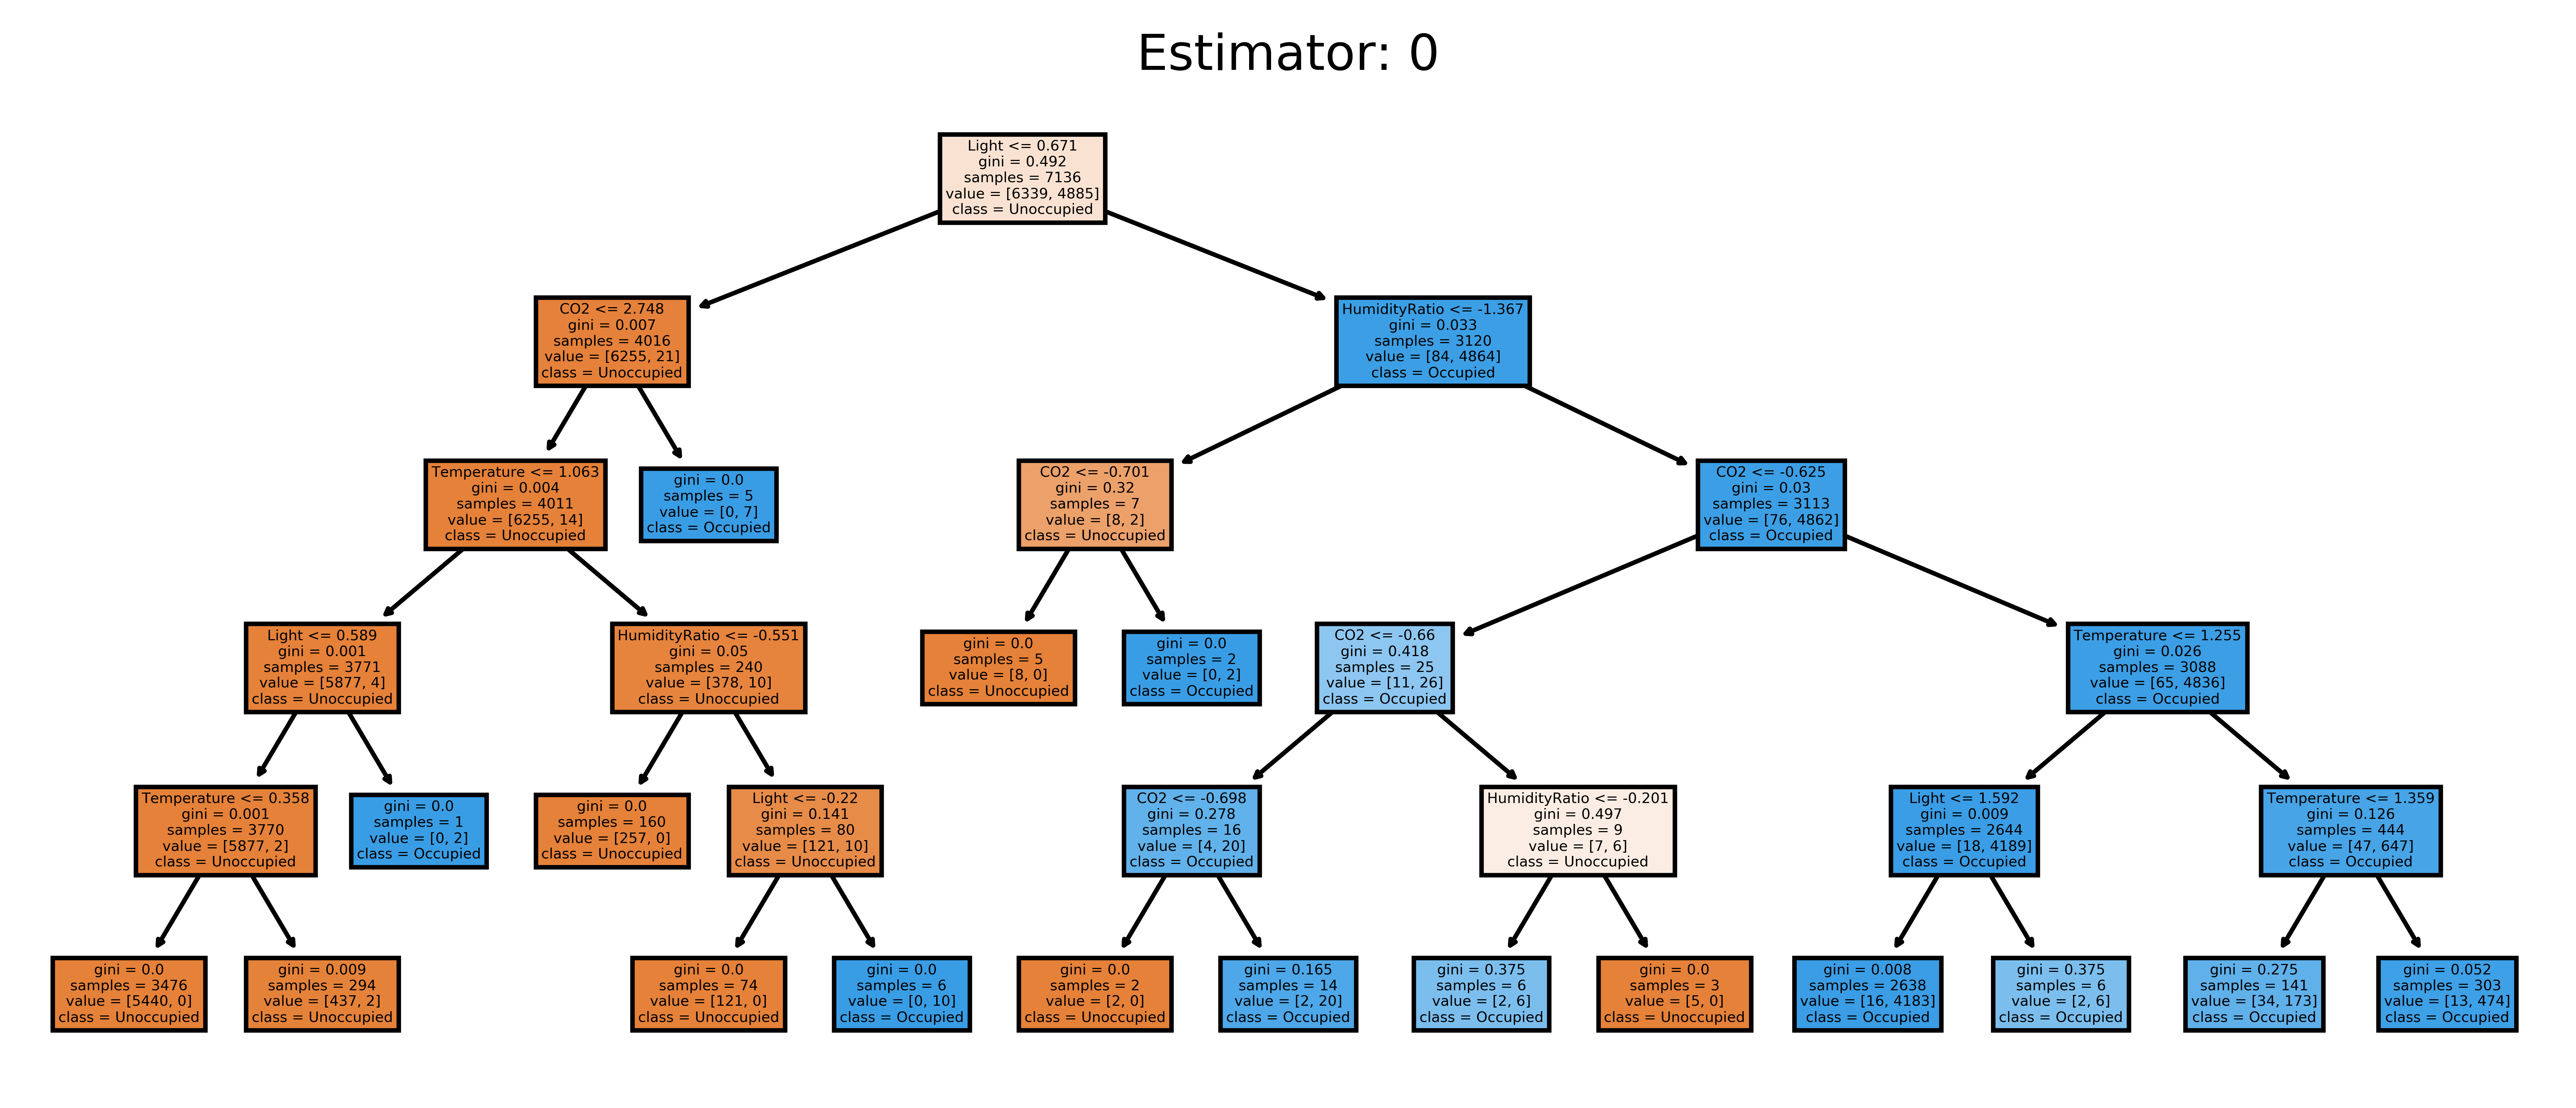

In [32]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,4), dpi=900)

# estract estimator
for index in range(0,1): 
    fn = list(df_test.columns)
    cn  =['Unoccupied', 'Occupied']
    
    tree.plot_tree(rft.estimators_[index],
                feature_names = fn, 
                class_names=cn,
                filled = True,
                ax = axes)
    axes.set_title('Estimator: ' + str(index), fontsize = 11)
    #fig.savefig('imagename.png')


In [30]:
fig.savefig('Tree.png')